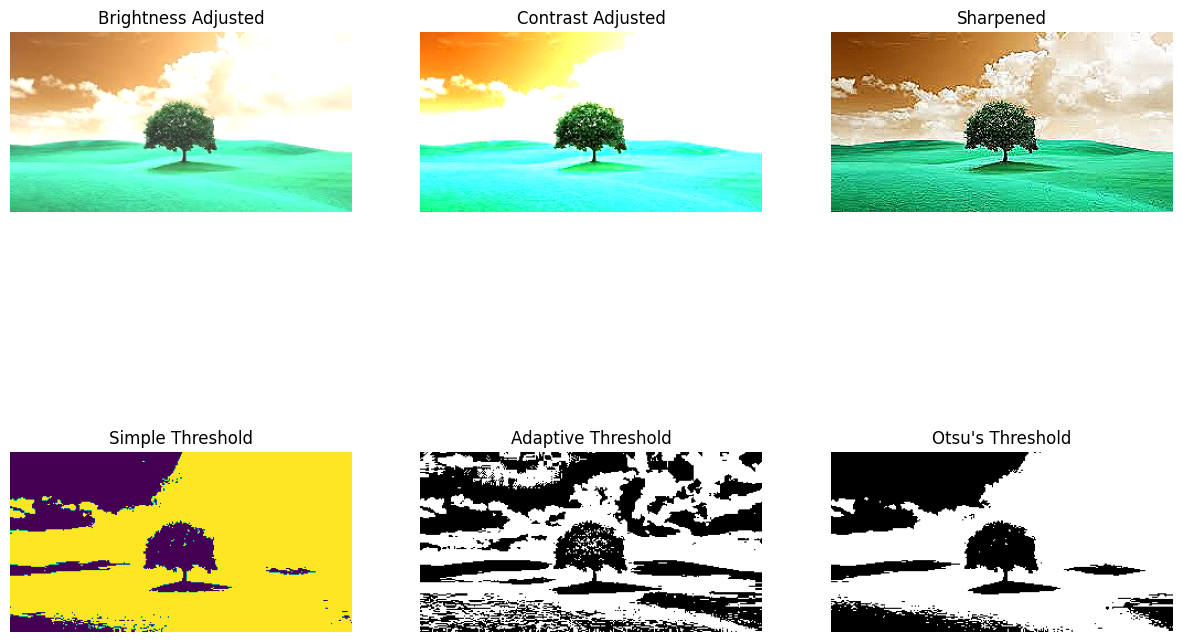

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
img = cv2.imread(r'.\image\Tree.jpg') 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   
brightness = cv2.convertScaleAbs(img, alpha=1.0, beta=50)
contrast = cv2.convertScaleAbs(img, alpha=2.0, beta=0)
kernel_sharp = np.array([[0, -1, 0],
                         [-1, 5, -1],
                         [0, -1, 0]])

sharpened = cv2.filter2D(img, -1, kernel_sharp)
_, simple_thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
adaptive_thresh = cv2.adaptiveThreshold(
    gray, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY, 55, 2)
_, otsu_thresh = cv2.threshold(gray, 0, 255,
                               cv2.THRESH_BINARY + cv2.THRESH_OTSU)
titles = ['Brightness Adjusted', 'Contrast Adjusted',
          'Sharpened', 'Simple Threshold', 'Adaptive Threshold',
          "Otsu's Threshold"]

images = [brightness , contrast ,
          sharpened, simple_thresh, adaptive_thresh, otsu_thresh]

cmap_flags = [None, None, None, None, 'gray', 'gray', 'gray']

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax = ax.flatten()

for i in range(len(images)):
    if cmap_flags[i]:
        ax[i].imshow(images[i], cmap=cmap_flags[i])
    else:
        ax[i].imshow(images[i])
    ax[i].set_title(titles[i])
    ax[i].axis('off')


